<a href="https://colab.research.google.com/github/MINEEJA/Bulldozer-_price_prediction/blob/main/bulldozer_price_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bulldozer price prediction**

first  we have to import Bulldozer data  from the Github address "https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip". Then it is extracted to a local file.

In [ ]:
!wget https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip # download files from GitHub as zip

import os
import zipfile

local_zip = 'bluebook-for-bulldozers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('.') # extract all data into current working directory
zip_ref.close()

--2023-03-06 10:53:49--  https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip [following]
--2023-03-06 10:53:49--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/bluebook-for-bulldozers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72077822 (69M) [application/zip]
Saving to: ‘bluebook-for-bulldozers.zip.1’

bluebook-for-bulldo 100%[===================>]  68.74M   296MB/s    in 0.2s    

2023-03-06 10:53:5

## ***Predicting the price of bulldozers using machine learning***

---




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df =pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", 
                low_memory=False)

**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
   df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

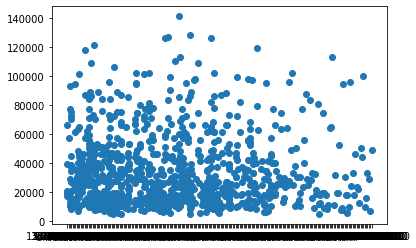

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

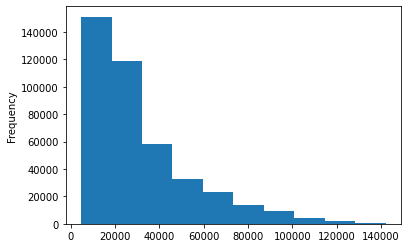

In [ ]:
df.SalePrice.plot.hist();

In [ ]:
df = pd. read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                  low_memory=False,
                  parse_dates=['saledate'])

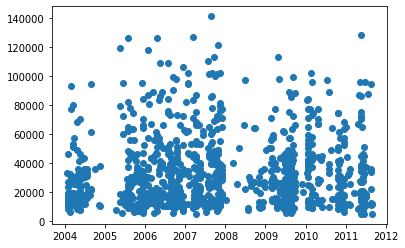

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [ ]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [ ]:
df.sort_values(by=['saledate'],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df_c = df.copy()
df_c["saleYear"] = df_c.saledate.dt.year
df_c['saleMonth'] = df_c.saledate.dt.month
df_c["saleDay"] = df_c.saledate.dt.day
df_c["saleDayOfWeek"] = df_c.saledate.dt.dayofweek

In [ ]:
df_c['saleDayOfYear'] =df_c.saledate.dt.dayofyear

In [ ]:
df_c.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
df_c.drop("saledate", axis=1, inplace=True)

 Identify columns with string values and convert them to categorical data.

In [ ]:
for label, content in df_c.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_c.items():
  if pd.api.types.is_string_dtype(content):
    df_c[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
df_c.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_c.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [ ]:
df_c.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [ ]:
df_c.to_csv("bluebook-for-bulldozers/train_tmp.csv", 
            index=False)

In [ ]:
df_c=pd.read_csv("bluebook-for-bulldozers/train_tmp.csv", low_memory=False )

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Finding and replacing null values.

In [ ]:
for label, content in df_c.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


Adding a binary column which indicates whether the value was missing or not.

In [ ]:
for label, content in df_c.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_c[label+"_is_missing"] = pd.isnull(content)
      df_c[label] = content.fillna(content.median())

In [ ]:
for label, content in df_c.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
df_c.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

Filling and turning categorical variables to numbers

In [ ]:
for label, content in df_c.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_c.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_c[label+ "is_missing"] = pd.isnull(content)
    df_c[label] = pd. Categorical(content).codes+1

In [ ]:
 pd.Categorical(df_c["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
df_c.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

## **Modelling the data**

In [ ]:
!pip install scikit_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_c.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, SalesID to Steering_Controlsis_missing
Columns: 412698 entries, 0 to 412697
dtypes: object(412698)
memory usage: 324.3+ MB


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#took longer to execute
#%%time
'''model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42,
                              max_samples=10000))
model.fit(df_c.drop("SalePrice", axis=1), df_c["SalePrice"])
'''

'model = RandomForestRegressor(n_jobs=-1, \n                              random_state=42,\n                              max_samples=10000))\nmodel.fit(df_c.drop("SalePrice", axis=1), df_c["SalePrice"])\n'

In [ ]:
#model.score(df_c.drop(columns="SalePrice"), df_c["SalePrice"])

Splitting data into training and validating sets.

*   Training = all samples up until 2011
*   Valid = all samples form January 1, 2012 - April 30, 2012  
*   Test = all samples from May 1, 2012 - November 2012









In [ ]:
df_c.saleYear.value_counts()

In [ ]:
df_val = df_c[df_c.saleYear==2012]
df_train = df_c[df_c.saleYear !=2012]

len(df_val), len(df_train)

(11573, 401125)

In [ ]:
X_train, y_train = df_train.drop(columns="SalePrice"),df_train.SalePrice
X_valid, y_valid = df_val.drop(columns="SalePrice"), df_val.SalePrice
X_train.shape, y_train.shape,  X_valid.shape, y_valid.shape

Evaluation function


In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
   train_preds = model.predict(X_train)
   val_preds = model.predict(X_valid)
   scores = {"Training MaE":mean_absolute_error(y_train, train_preds ),
             "valid MaE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE":rmsle(y_train, train_preds ),
             "valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2":model.score(X_train, y_train),
             "valid R^2": model.score(X_valid, y_valid)
             }
   return scores

In [ ]:
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [ ]:
%%time
model.fit(X_train, y_train)

CPU times: user 40.7 s, sys: 245 ms, total: 41 s
Wall time: 38.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [ ]:
show_scores(model)

{'Training MaE': 5555.94730597694,
 'valid MaE': 7154.907298021258,
 'Training RMSLE': 0.2576315650623708,
 'valid RMSLE': 0.29400932317817785,
 'Training R^2': 0.8610756521870095,
 'valid R^2': 0.8337548385901052}

# **Hyperparameter tuning with RandomizedSearchCV**

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {'n_estimators':np.arange(10,100,10),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':[0.5,1,'sqrt','auto'],
           'max_samples':[10000]}
rs_model= RandomizedSearchCV(RandomForestRegressor(), 
                             param_distributions=rf_grid,
                             n_iter=20,
                             cv=5,
                             verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/_pa

CPU times: user 2min 25s, sys: 3.73 s, total: 2min 28s
Wall time: 2min 29s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [0.5, 1, 'sqrt',
                                                             'auto'],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_depth': 10}

In [ ]:
show_scores(rs_model)

{'Training MaE': 6542.512931679993,
 'valid MaE': 7917.465645359493,
 'Training RMSLE': 0.29504677707492083,
 'valid RMSLE': 0.31875926410034655,
 'Training R^2': 0.8154508721193038,
 'valid R^2': 0.7975651392225142}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.5 MB/s eta 0:00:00


In [ ]:
show_scores(ideal_model)

{'Training MaE': 2926.3282017490806,
 'valid MaE': 5914.98887362323,
 'Training RMSLE': 0.14337526151439658,
 'valid RMSLE': 0.24506516657782892,
 'Training R^2': 0.9596948909530246,
 'valid R^2': 0.883353701564126}

In [ ]:
import catboost as ctb

In [ ]:
model_ctb=ctb.CatBoostRegressor()
model_ctb.fit(X_train, y_train)
print(model_ctb.score(X_valid, y_valid))
#ctb_predict=model_ctb.predict(X_valid)
#show_scores(model_ctb)

Learning rate set to 0.10556
0:	learn: 21817.1970684	total: 400ms	remaining: 6m 40s
1:	learn: 20745.6747962	total: 785ms	remaining: 6m 31s
2:	learn: 19899.9610080	total: 1.12s	remaining: 6m 12s
3:	learn: 19138.8790606	total: 1.5s	remaining: 6m 12s
4:	learn: 18481.0326901	total: 1.87s	remaining: 6m 12s
5:	learn: 17937.7572802	total: 2.21s	remaining: 6m 5s
6:	learn: 17387.9034897	total: 2.51s	remaining: 5m 55s
7:	learn: 16940.5551014	total: 2.87s	remaining: 5m 56s
8:	learn: 16564.8479011	total: 3.19s	remaining: 5m 51s
9:	learn: 16167.9520806	total: 3.5s	remaining: 5m 46s
10:	learn: 15849.8792805	total: 3.76s	remaining: 5m 38s
11:	learn: 15567.3684542	total: 4s	remaining: 5m 29s
12:	learn: 15274.0181281	total: 4.31s	remaining: 5m 27s
13:	learn: 14978.5412091	total: 4.6s	remaining: 5m 24s
14:	learn: 14753.1459752	total: 4.87s	remaining: 5m 19s
15:	learn: 14533.9154011	total: 5.16s	remaining: 5m 17s
16:	learn: 14303.7309509	total: 5.51s	remaining: 5m 18s
17:	learn: 14101.3077624	total: 5.94

## **Make predictions on test data**

In [ ]:
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


** Funtion to prepocess test data**

In [ ]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Columns: 102 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(2), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [ ]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice', 'auctioneerID_is_missing'}

In [ ]:
#set(X_train.columns) - set(df_test.columns)
c=set(X_train.columns)
D=set(df_test.columns)
len(c),len(D)

(102, 101)

In [ ]:
c.difference(D)

set()

In [ ]:
df_test["auctioneerID_is_missing"] = False
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [ ]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
e=X_train.columns
df_test=df_test.reindex(e, axis=1)

In [ ]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Widthis_missing', 'Stick_Lengthis_missing',
       'Thumbis_missing', 'Pattern_Changeris_missing',
       'Grouser_Typeis_missing', 'Backhoe_Mountingis_missing',
       'Blade_Typeis_missing', 'Travel_Controlsis_missing',
       'Differential_Typeis_missing', 'Steering_Controlsis_missing'],
      dtype='object', length=102)

In [ ]:
test_preds = ideal_model.predict(df_test)

In [ ]:
df_preds =pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalePrice"]= test_preds
df_preds

,SalesID,SalePrice
0,1227829,18239.989949
1,1227844,16481.167504
2,1227847,47492.593458
3,1227848,67350.090275
4,1227863,58961.137199
...,...,...
12452,6643171,41564.122354
12453,6643173,11854.319806
12454,6643184,14171.930721
12455,6643186,19405.907649


In [ ]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

CPU times: user 3min 46s, sys: 914 ms, total: 3min 47s
Wall time: 2min 30s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [ ]:
show_scores(fast_model)

{'Training MaE': 2545.242047338661,
 'valid MaE': 5922.773975910366,
 'Training RMSLE': 0.12931144255217777,
 'valid RMSLE': 0.24415850903485362,
 'Training R^2': 0.9671440863261911,
 'valid R^2': 0.8819124738344845}

In [ ]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18239.989949
1,1227844,16481.167504
2,1227847,47492.593458
3,1227848,67350.090275
4,1227863,58961.137199
...,...,...
12452,6643171,41564.122354
12453,6643173,11854.319806
12454,6643184,14171.930721
12455,6643186,19405.907649


# **Feature Importance**

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.35396269e-02, 2.06769112e-02, 4.21866863e-02, 1.87157144e-03,
       3.32398683e-03, 2.09321762e-01, 3.21832152e-03, 9.90546674e-04,
       4.58597478e-02, 4.87868598e-02, 6.07659191e-02, 4.60434780e-03,
       1.76084680e-02, 1.52823381e-01, 4.46940745e-02, 5.94667910e-03,
       1.85337490e-03, 2.06335324e-03, 3.08358801e-03, 5.79846997e-02,
       7.29966889e-04, 4.32031520e-04, 9.04381337e-04, 2.13700687e-04,
       1.12169272e-03, 2.30714406e-05, 9.83014419e-04, 4.88718167e-03,
       2.97065495e-03, 1.17192968e-03, 3.22542497e-03, 3.50090467e-03,
       4.01030021e-03, 1.11294231e-03, 2.06668557e-03, 1.14896700e-02,
       9.13310292e-04, 1.22274522e-02, 1.20204898e-03, 1.60180975e-03,
       1.32673393e-03, 8.61763279e-04, 1.43609359e-03, 5.60070865e-04,
       5.50939665e-04, 3.74203088e-04, 5.22057225e-04, 1.93361150e-03,
       8.15556344e-04, 2.40332457e-04, 9.11593651e-04, 7.30910442e-02,
       3.80012148e-03, 5.66412402e-03, 2.88359752e-03, 9.95727385e-03,
      

In [ ]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

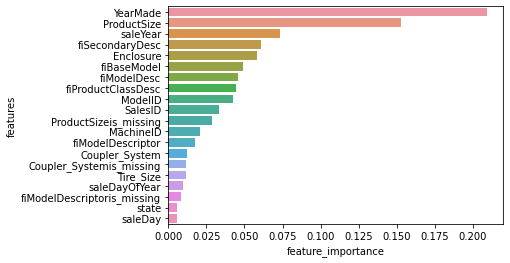

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
sum(ideal_model.feature_importances_)

1.0000000000000009

In [ ]:
df.ProductSize.isna().sum()

216605

In [ ]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [ ]:
df.Thumb.value_counts()

None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64